# CAMVID-TINY Image Segmentation

## Import FastAI modules

In [1]:
from fastai.vision.all import *

## Download Dataset

In [2]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#4) [Path('/home/gurucharan/.fastai/data/camvid_tiny/models'),Path('/home/gurucharan/.fastai/data/camvid_tiny/labels'),Path('/home/gurucharan/.fastai/data/camvid_tiny/codes.txt'),Path('/home/gurucharan/.fastai/data/camvid_tiny/images')]

In [3]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

## Create dataloaders with DataBlock

In [4]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [5]:
camvid = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items = get_image_files,
                   get_y = label_func,
                   splitter=RandomSplitter(),
                   batch_tfms=aug_transforms(size=(120,160)))

In [6]:
dls = camvid.dataloaders(path/"images", path=path, bs=8)

## Visualize Dataset

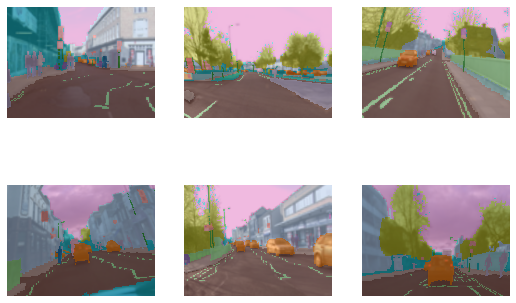

In [7]:
dls.show_batch(max_n=6)

## Create U-Net learner

/home/gurucharan/anaconda3/envs/fastai/lib/python3.7/site-packages/fastai/learner.py:53: UserWarning: Could not load the optimizer state.
  if with_opt: warn("Could not load the optimizer state.")


SuggestedLRs(lr_min=0.00036307806149125097, lr_steep=0.0003981071640737355)

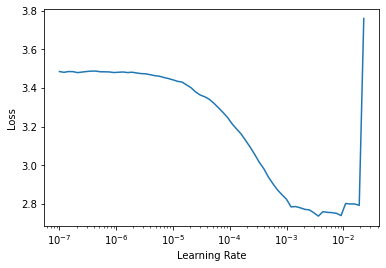

In [8]:
learn = unet_learner(dls, resnet34).to_fp16()

In [9]:
learn.fine_tune(6)

epoch,train_loss,valid_loss,time
0,3.533329,2.782043,00:03


epoch,train_loss,valid_loss,time
0,2.088694,1.711716,00:02
1,1.737705,1.364118,00:02
2,1.528749,1.138716,00:02
3,1.387564,1.013088,00:02
4,1.256123,0.903547,00:02
5,1.152794,0.877638,00:02


## Inference result

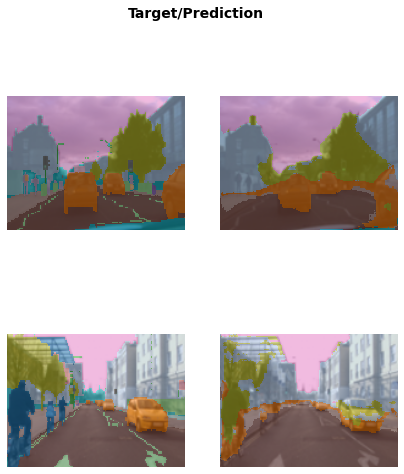

In [12]:
learn.show_results(max_n=6, figsize=(7,8))